<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/HK_Sent_Analysis2019_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 8.4 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=72ea73310ff22db6d80acf626cd6f2864c785bbdda7e2e83452afcb2bf9be68c
  Stored in directory: /root/.cache/pip/wheels/83/95/c0/42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built NRCLex


In [2]:
# TextBlob Lemmatizer with appropriate POS tag
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# 먼저 데이터프레임을 만들어 둔다.
import pandas as pd
senti2019 = pd.DataFrame({'date':['positive', 'negative','fear', 'trust', 'anticipation', 
                                      'anger', 'sadness', 'surprise', 'joy', 'disgust']})
senti2019

,date
0,positive
1,negative
2,fear
3,trust
4,anticipation
5,anger
6,sadness
7,surprise
8,joy
9,disgust


In [80]:
# 폴더 내 html만 추려서 리스트에 저장하기
import os
# files=[]
files2019=os.listdir("/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/2019")
# for file in file_names :
#   if '.html' in file :
#     # print(file)
#     files.append(file)
files2019

['20190220question.txt',
 '20190123question.txt',
 '20190130question.txt',
 '20190227question.txt',
 '20190116question.txt',
 '20190320question.txt',
 '20190327question.txt',
 '20190403question.txt',
 '20190417question.txt',
 '20190508question.txt',
 '20190515question.txt',
 '20190522question.txt',
 '20190529question.txt',
 '20190605question.txt',
 '20190612question.txt',
 '20190619question.txt',
 '20190626question.txt',
 '20190703question.txt',
 '20191023question.txt',
 '20191030question.txt',
 '20191106question.txt',
 '20191113question.txt',
 '20191120question.txt',
 '20191127question.txt',
 '20191204question.txt',
 '20191211question.txt',
 '20191218question.txt',
 '20190109question.txt']

In [22]:
import re
import nltk
from textblob import TextBlob, Word
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nrclex import NRCLex
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
for file in files2019 :  
  f = open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/2019/'+file+'', 'r', encoding='utf-8')
  ques=f.read().strip()
  # print(ques.count(" ")+1)

  # basic preprocessing
  re01=re.sub("[^a-zA-Z]", " ", ques)    # 영어 외 모두 제거
  re02=re01.replace("Hong Kong", "Hong_Kong")
  re03=re02.replace("United States", "United_States")
  re04=re03.replace("South Korea", "South_Korea")
  re05=re04.replace("North Korea", "North_Korea")
  re06=re05.replace("New Zealand", "New_Zealand")
  ques_spc=' '.join(re06.split())           # 2칸 이상 공백 제거

  # tokenizing
  tokens=ques_spc.split(' ')

  ## Lemmatization
  # Define lemmatization function
  def lemmatize_with_postag(sentence):
      sent = TextBlob(sentence)
      tag_dict = {"J": 'a', 
                  "N": 'n', 
                  "V": 'v', 
                  "R": 'r'}
      words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
      lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
      return lemmatized_list

  proc01=' '.join(tokens)
  proc02=proc01.lower()
  lemmatokens=lemmatize_with_postag(proc02)

  # stopwords와 hansard_terms 동시 필터링
  stop_words=set(stopwords.words('english'))
  hansard_terms=['pm', 'ms', 'mr', 'minister', 'ministry', 'dr', 'prof.', 'speaker',
                'deputy', 'assoc.', 'sir', 'mp', 'mps', 'viii', 'vii', 'vi', 'v',
                'iv', 'iii', 'ii', 'i']
  clean = []
  for word in lemmatokens: 
      if word not in stop_words:
          if word not in hansard_terms: 
              clean.append(word) 

  ## Sentimental Analysis
  text=' '.join(clean)
  text_object= NRCLex(text)

  # dataframe 생성
  data = text_object.raw_emotion_scores
  pos=data['positive']
  neg=data['negative']
  fea=data['fear']
  tru=data['trust']
  ant=data['anticipation']
  ang=data['anger']
  sad=data['sadness']
  sur=data['surprise']
  joy=data['joy']
  dis=data['disgust']

  column_name=re.sub("[^\d]","",file)
  df = pd.DataFrame({''+column_name+'':[pos, neg,fea, tru, ant,ang, sad, sur, joy, dis]})
  senti2019=pd.concat([senti2019, df], axis = 1)

senti2019

,date,20190220,20190123,20190130,20190227,20190116,20190320,20190327,20190403,20190417,...,20191023,20191030,20191106,20191113,20191120,20191127,20191204,20191211,20191218,20190109
0,positive,525,451,617,639,479,515,536,521,548,...,534,444,658,611,585,684,582,589,622,589
1,negative,329,258,338,320,396,265,331,317,291,...,307,301,348,337,474,372,345,366,374,393
2,fear,181,188,232,181,228,134,227,202,179,...,232,241,286,294,364,366,268,295,270,242
3,trust,354,376,433,412,359,348,371,375,391,...,351,355,488,478,428,549,438,445,480,483
4,anticipation,262,242,291,240,240,217,257,278,256,...,197,199,310,261,300,231,269,218,233,280
5,anger,88,86,121,55,101,46,76,96,68,...,95,92,138,103,144,176,113,142,91,106
6,sadness,113,86,101,102,131,50,128,114,108,...,109,126,127,121,206,115,111,129,123,140
7,surprise,40,73,47,63,68,52,53,57,59,...,36,59,68,65,84,62,48,50,50,92
8,joy,101,83,90,111,106,92,82,103,106,...,71,74,99,119,74,72,90,85,84,124
9,disgust,47,39,68,41,108,19,72,69,32,...,76,62,42,44,97,52,31,67,55,76


In [82]:
# senti2019와 senti2020을 저장한다.
senti2019.to_excel("/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/senti2019_raw.xlsx", index=False)

In [87]:
# senti2019_raw와 senti2020_raw를 불러와서 결합한다.
senti2019_raw=pd.read_excel("/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/senti2019_raw.xlsx")
senti2020_raw=pd.read_excel("/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/senti2020_raw.xlsx")
senti2020_raw=senti2020_raw.drop(['category'], axis=1)   # 2020의 category컬럼을 제거한다.
senti20192020_raw=pd.concat([senti2019_raw, senti2020_raw], axis = 1)   # 2019년과 2020년을 붙인다.
senti20192020_raw=senti20192020_raw.sort_index(axis=1)    # 컬럼이름을 정렬
senti20192020_raw=senti20192020_raw.set_index('date')  # date컬럼을 인덱스로 변경
senti20192020_raw
senti20192020_raw.to_excel("/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/senti20192020_raw.xlsx", index=False)

In [91]:
# senti20192020_raw의 행과 열을 바꾼다.
df20192020=senti20192020_raw.T
df20192020

date,positive,negative,fear,trust,anticipation,anger,sadness,surprise,joy,disgust
20190109,589,393,242,483,280,106,140,92,124,76
20190116,479,396,228,359,240,101,131,68,106,108
20190123,451,258,188,376,242,86,86,73,83,39
20190130,617,338,232,433,291,121,101,47,90,68
20190220,525,329,181,354,262,88,113,40,101,47
20190227,639,320,181,412,240,55,102,63,111,41
20190320,515,265,134,348,217,46,50,52,92,19
20190327,536,331,227,371,257,76,128,53,82,72
20190403,521,317,202,375,278,96,114,57,103,69
20190417,548,291,179,391,256,68,108,59,106,32


In [92]:
df20192020.columns

Index(['positive', 'negative', 'fear', 'trust', 'anticipation', 'anger',
       'sadness', 'surprise', 'joy', 'disgust'],
      dtype='object', name='date')

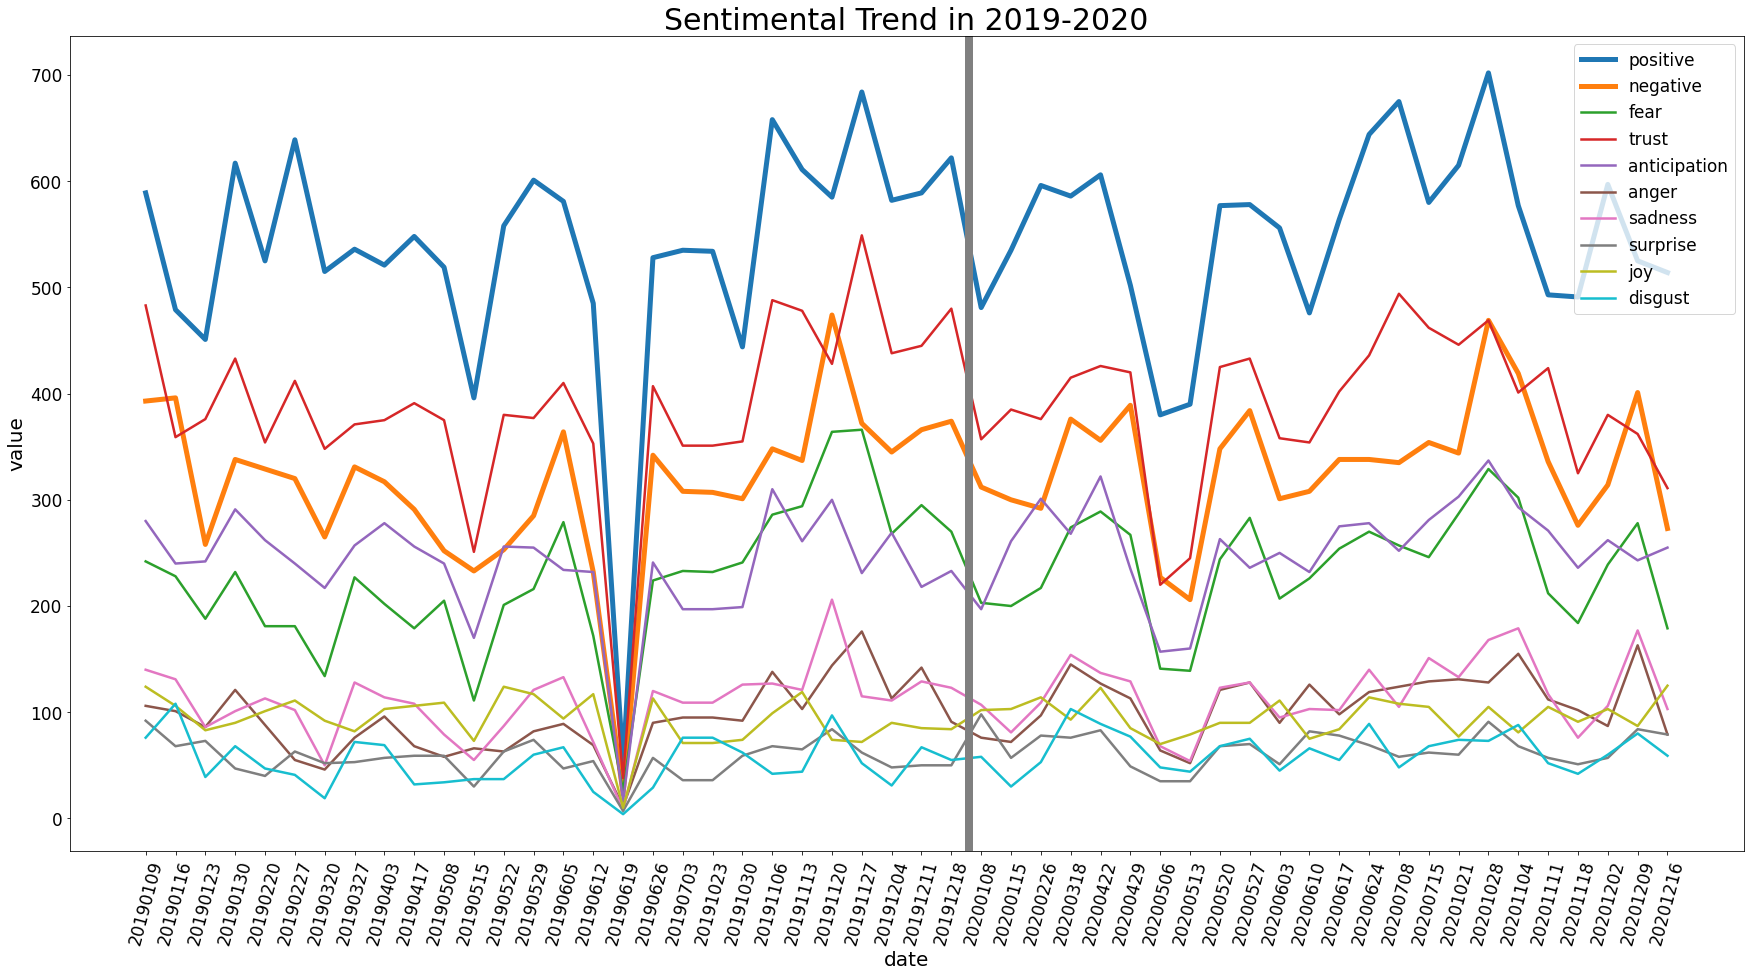

In [127]:
# 차트 그리기
fig = plt.figure(figsize=(30, 15)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성

ax.plot(df20192020['positive'], label='positive', linewidth=5)
ax.plot(df20192020['negative'], label='negative', linewidth=5)
ax.plot(df20192020['fear'], label='fear', linewidth=2.5)
ax.plot(df20192020['trust'], label='trust', linewidth=2.5)
ax.plot(df20192020['anticipation'], label='anticipation', linewidth=2.5)
ax.plot(df20192020['anger'], label='anger', linewidth=2.5)
ax.plot(df20192020['sadness'], label='sadness', linewidth=2.5)
ax.plot(df20192020['surprise'], label='surprise', linewidth=2.5)
ax.plot(df20192020['joy'], label='joy', linewidth=2.5)
ax.plot(df20192020['disgust'], label='disgust', linewidth=2.5)

ax.set_title('Sentimental Trend in 2019-2020', fontsize=30) # 타이틀 설정
ax.set_ylabel('value', fontsize=20) # x축 설정
ax.set_xlabel('date', fontsize=20) # y축 설정

ax.legend(fontsize=17, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디
plt.yticks(fontsize=17)
plt.xticks(rotation=75, fontsize=17)
# plt.axvline(27.6, 0, color='r', linestyle=':', linewidth=10)
plt.axvline(27.6, 0, color='grey', linestyle='solid', linewidth=8)
plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


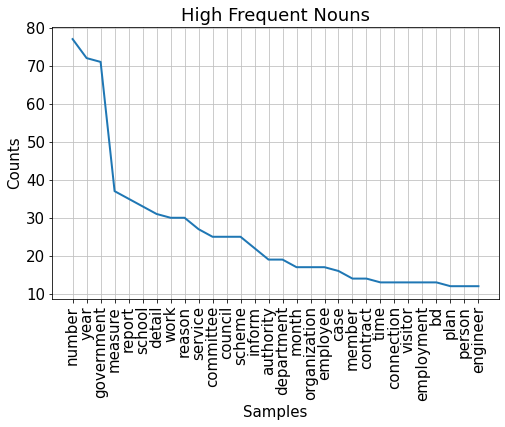

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import matplotlib.pyplot as plt

tokens_tag=pos_tag(clean)
plt.figure(figsize=(8, 5))              # changing the graph size
plt.rcParams.update({'font.size': 15})   # changing a font size
plt.title('High Frequent Nouns')
nouns=[word for word, pos in tokens_tag if pos in ['NN', 'NNS']]

Freq_dist_nltk = nltk.FreqDist(nouns)
Freq_dist_nltk.plot(30, cumulative=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentimental Classification,Sentimental Count
0,positive,589
1,trust,483
2,negative,393
4,anticipation,280
5,fear,242
8,sadness,140
6,joy,124
9,anger,106
7,surprise,92
3,disgust,76


---
---
* 이하는 국가명 리스트
* 다음 번 분석시 참고

In [2]:
!pip install country_list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 6.6 MB/s 


In [13]:
# 국가명 리스트 생성
from country_list import countries_for_language
# countries_for_language returns a list of tuples now, might be changed to an OrderedDict
countries = dict(countries_for_language('en'))
countries=list(countries.values())

In [15]:
# 나라 이름 조회하는 코드
from country_list import countries_for_language
countries = dict(countries_for_language('en'))
country_list=list(countries.values())
country_list.append('Hong Kong')     # 리스트를 임의로 추가
country_list.append('South Korea')
country_list.append('North Korea')
country_list.append('PRC')
for country in country_list :
  if country in ques_spc :
    print(country)

China
Singapore
United States
Hong Kong
